<a href="https://colab.research.google.com/github/Katerine-Chanci-Echeverri/sales-predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount("/content/drive")
sales_predictions = "/content/drive/MyDrive/Colab Notebooks/Coding Dojo 🐉/Proyecto/sales_predictions.csv"

salesp_df = pd.read_csv(sales_predictions)
salesp_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning

In [2]:
#Data shape (rows, columns)
salesp_df.shape

(8523, 12)

In [3]:
#Data type for each column 
salesp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Are there duplicate values?
salesp_df.duplicated().sum()

0

# Missing values

In [5]:
#Missing values
salesp_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### "Item_Weight" missing values

In [6]:
#New df with only Nan values in the "Item_Weight" column
weight_mask_nan = salesp_df["Item_Weight"].isna()

salesp_weight = salesp_df.loc[weight_mask_nan,:]
salesp_weight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [7]:
salesp_weight["Outlet_Identifier"].value_counts() #Salesp_weight df

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [8]:
salesp_df["Outlet_Identifier"].value_counts() #Salesp_df df

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [9]:
salesp_weight["Outlet_Establishment_Year"].value_counts() #Salesp_weight df

1985    1463
Name: Outlet_Establishment_Year, dtype: int64

In [10]:
salesp_df["Outlet_Establishment_Year"].min() #Salesp_df df

1985

In [11]:
salesp_df["Outlet_Establishment_Year"].value_counts() #Salesp_df df

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Based on the data frame analysis, we found that all missing data correspond to two stores only (OUT027 and 0UT019). Also, all missing data are dated in 1985, which is the minimum in "Outlet_Establishment_Year". We can infer, that possibly, wasn't common to record the "Item_Weight" before 1986. 

In order to fill these missing data in the "Item_Weight" column, we're going to suppose that the item's weight doesn't change too much in the years around 1985. The next year we have data for is 1987, so we'll take the mean value of every item weight in that year, and then fill in the missing data in 1985 with that information. 

In [12]:
salesp_weight["Item_Type"].value_counts()

Fruits and Vegetables    213
Snack Foods              212
Household                151
Frozen Foods             138
Dairy                    116
Baking Goods             112
Canned                   110
Health and Hygiene        90
Meat                      88
Soft Drinks               71
Breads                    47
Others                    32
Hard Drinks               31
Breakfast                 21
Starchy Foods             18
Seafood                   13
Name: Item_Type, dtype: int64

In [13]:
#New df with 1987 data only
year_mask = salesp_df["Outlet_Establishment_Year"] == 1987
salesp_year = salesp_df.loc[year_mask, :]
salesp_year.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
14,FDF32,16.35,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260
20,FDN22,18.85,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
27,DRJ59,11.65,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312


In [14]:
salesp_year["Item_Type"].value_counts() #Salesp_year df

Fruits and Vegetables    142
Snack Foods              125
Household                103
Frozen Foods              92
Dairy                     80
Baking Goods              73
Canned                    65
Health and Hygiene        61
Soft Drinks               49
Meat                      41
Breads                    25
Hard Drinks               23
Starchy Foods             19
Others                    16
Breakfast                 13
Seafood                    5
Name: Item_Type, dtype: int64

In [15]:
#"Item_Weight" mean group by "Item_Type" (1987 data)
item_type_weight = salesp_year.groupby("Item_Type")["Item_Weight"].mean().round(2)
print(item_type_weight)

Item_Type
Baking Goods             12.04
Breads                   11.05
Breakfast                12.56
Canned                   11.92
Dairy                    13.07
Frozen Foods             13.25
Fruits and Vegetables    13.26
Hard Drinks              11.74
Health and Hygiene       13.03
Household                14.03
Meat                     13.38
Others                   14.01
Seafood                  13.00
Snack Foods              13.40
Soft Drinks              12.23
Starchy Foods            13.56
Name: Item_Weight, dtype: float64


In [16]:
#Filling missing data in the "Item_Weight" column 
for indx in range(0,8523):
  if np.isnan(salesp_df["Item_Weight"].iloc[indx]):
    row = salesp_df.iloc[indx]
    item_type = row["Item_Type"]
    item_weight = item_type_weight[item_type]
    salesp_df["Item_Weight"].iloc[indx] = item_weight

salesp_df.info()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
#Let's check!
fill_weight_mask = salesp_df["Outlet_Establishment_Year"] == 1985
salesp_df.loc[fill_weight_mask, :].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,13.40,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,11.74,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,12.04,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,12.04,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,11.92,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


### "Outlet_Size" missing values

In [18]:
salesp_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
#New df with with only Nan values in the "Outlet_Size" column
size_mask = salesp_df["Outlet_Size"].isna()
salesp_size = salesp_df.loc[size_mask,:]
salesp_size.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [20]:
salesp_size["Outlet_Identifier"].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

In [21]:
salesp_size["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [22]:
salesp_size.groupby("Outlet_Identifier")["Outlet_Type"].value_counts()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        555
OUT017             Supermarket Type1    926
OUT045             Supermarket Type1    929
Name: Outlet_Type, dtype: int64

Based on the data frame analysis, we found that all missing data correspond to three stores only (OUT010, OUT017, and 0UT045). Also, all missing data are related to only two "Outlet_Type" (Grocery Store and Supermarket Type1).

In order to fill in the missing data in the "Outlet_Size" column, and since it's a categorical value, we're going to take the mode value of the "Outlet_Size" which corresponds with the "Outlet_Type" Grocery Store and Supermarket Type1 from the data we have. 

In [23]:
salesp_df.groupby("Outlet_Type")["Outlet_Size"].agg(pd.Series.mode)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [24]:
salesp_df["Outlet_Size"].fillna("Small", inplace = True)
salesp_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [25]:
#Let's check
size_fill_mask = salesp_df["Outlet_Identifier"] == "OUT010"
salesp_df.loc[size_fill_mask,:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,Small,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Small,Tier 3,Grocery Store,184.4266


# Correct Data Types

In [26]:
salesp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### "Item_Fat_Content"

In [27]:
salesp_df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We found a discrepancy in the data. Thus, we're going to change "LF" and "low fat" to "Low Fat", and "reg" to "Regular".

In [28]:
salesp_df["Item_Fat_Content"] = salesp_df["Item_Fat_Content"].replace(["LF", "low fat"], "Low Fat")
salesp_df["Item_Fat_Content"] = salesp_df["Item_Fat_Content"].replace("reg", "Regular")

salesp_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Statistic analysis

In [29]:
salesp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Histograms

### "Item_Weight"


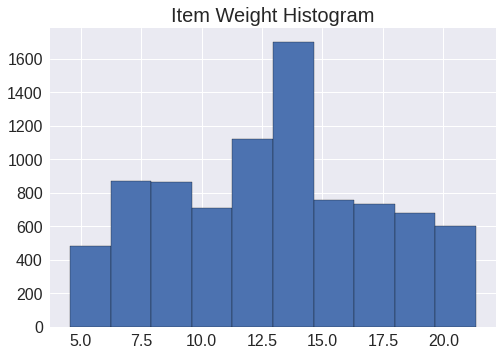

In [30]:
plt.style.use("seaborn")
salesp_df["Item_Weight"].hist(bins = 10, edgecolor = "black");
plt.title("Item Weight Histogram", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);


### "Item_MRP"

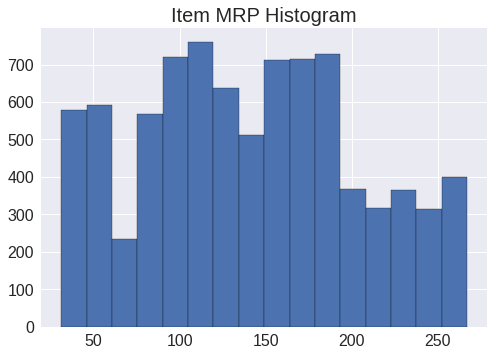

In [31]:
plt.style.use("seaborn")
salesp_df["Item_MRP"].hist(bins = 16, edgecolor = "black");
plt.title("Item MRP Histogram", fontsize = 20)
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Based on the histograms, we can infer, item weights vary between 5.0 and 20.0. Also, most of the items weigh between 12.5 and 15.0. On average, an item weighs 12.9.

On the other hand, on the Item MRP histogram, the maximum retail price per product oscillates between 30 and 270, approx. However, most of the products have a maximum retail price concentrated between 100 and 170. We can also infer, few products cost more than 200.

### Boxplots

### "Item_Visibility" vs. "Item_Fat_Content"

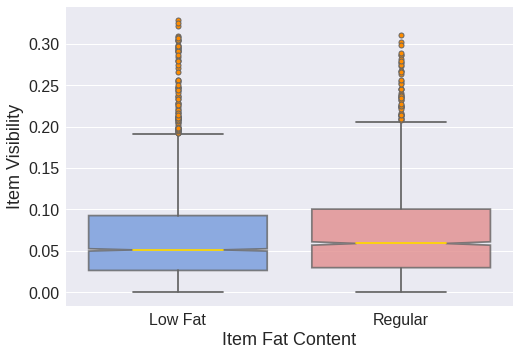

In [32]:
my_pal = {"Low Fat": "cornflowerblue", "Regular": "lightcoral"}
sns.boxplot(x = "Item_Fat_Content", y = "Item_Visibility", data = salesp_df, 
            palette = my_pal, boxprops = dict(alpha = 0.8), notch = True,  
            medianprops={"color": "gold"},  
            flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'darkorange'})

plt.xlabel("Item Fat Content", fontsize = 18);
plt.ylabel("Item Visibility", fontsize = 18);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Based on the Boxplot "Item_Visibility" vs "Item_Fat_Content", we can infer, the mean visibility for both low-fat and regular products is pretty close. What I expected was, based on the USA market and their eating behaviour, a higher mean visibility for regular products. On the other hand, diet culture could explain why mean visibility for low-fat products is so close to regular products. Also, we can see a larger Q3 percentile than the Q1 percentile for both categories. Several outliers points after the maximum are visualized too.

### "Item_MRP" vs. "Item_Outlet_Sales"

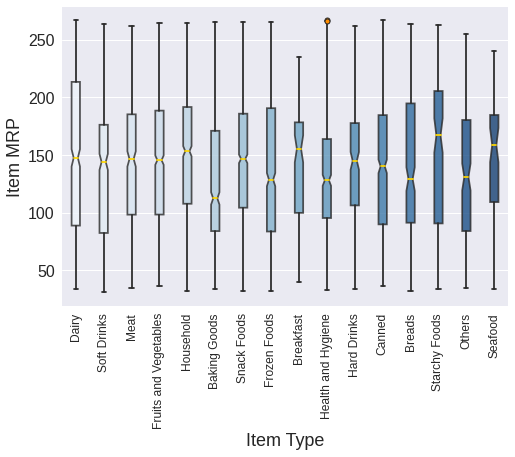

In [33]:
sns.boxplot(x = "Item_Type", y = "Item_MRP", data = salesp_df, 
            palette = "Blues", boxprops = dict(alpha = 0.8), notch = True,  
            medianprops={"color": "gold"},  
            flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'darkorange'}, 
            width = 0.3)

plt.xlabel("Item Type", fontsize = 18);
plt.ylabel("Item MRP", fontsize = 18);
plt.xticks(fontsize = 12, rotation = 90);
plt.yticks(fontsize = 16);

The Boxplot "Item_Type" vs "Item_MRP" could be hard to read because of the number of variables in the x-axis. However, is interesting to compare the product type against its mean maximum retail price. We can infer, the household, breakfast, starchy foods and seafood categories are the most expensive. On the other hand, baking goods are the less expensive category. 

### "Outlet_Size" vs. "Item_Outlet_Sales"

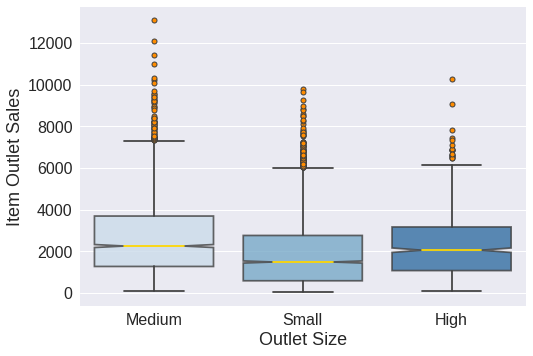

In [34]:
sns.boxplot(x = "Outlet_Size", y = "Item_Outlet_Sales", data = salesp_df, 
            palette = "Blues", boxprops = dict(alpha = 0.8), notch = True,  
            medianprops={"color": "gold"},  
            flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'darkorange'})

plt.xlabel("Outlet Size", fontsize = 18);
plt.ylabel("Item Outlet Sales", fontsize = 18);
plt.xticks(fontsize = 16);
plt.yticks(fontsize = 16);

Based on the "Outlet_Size" vs "Item_Outlet_Sales" boxplot, we can infer medium outlets sell more products, on average, in comparison with small and high outlets. Small ones are the outlets which sell fewer products, on average. In addition to that, we can see several outliers points after the maximum.

## Correlation and heatmap

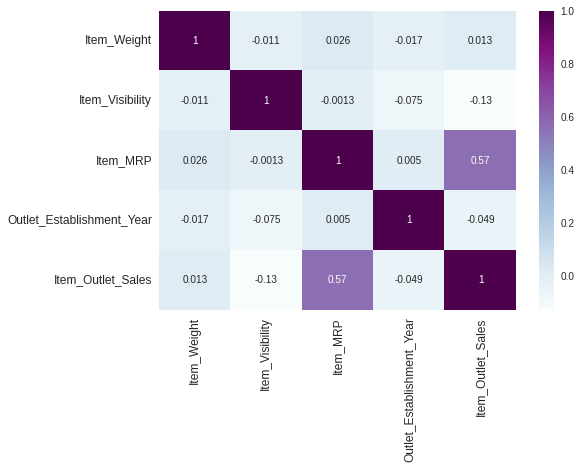

In [35]:
corr_salesp = salesp_df.corr()

sns.heatmap(corr_salesp, annot = True, cmap = "BuPu");
plt.xticks(fontsize = 12);
plt.yticks(fontsize = 12);

Based on the heatmap, we can see there is no much correlation between the variables. However, there is a correlation of 0.57 between "Item_MRP" and "Item_Outlet_Sales". 

# **Explanatory Data Visualization**

In [36]:
salesp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Before the explanatory data visualization, I wondered which columns could describe items' and outlet sales' properties the best. I determined "Item_Type", "Item_MRP", "Outlet_Location_Type", and "Item_Outlet_Sales" would be interesting columns to analyse. 

Thus, for the first explanatory data visualization, I will plot the "Item_Outlet_Sales" against the "Item_Type". Each graphic is discriminated by "Outlet_Location_Type". 

Analogously, I will plot the "Item_MRP" against the "Item_Type" for the second explanatory data visualisation. Again, each graphic is discriminated by "Outlet_Location_Type". 

In [44]:
#First plot data
outlet_sales = salesp_df.groupby(["Item_Type", "Outlet_Location_Type"])["Item_Outlet_Sales"].mean().round(2)
#outlet_sales

#Second plot data
item_MRP = salesp_df.groupby(["Item_Type", "Outlet_Location_Type"])["Item_MRP"].mean().round(2)
#item_MRP

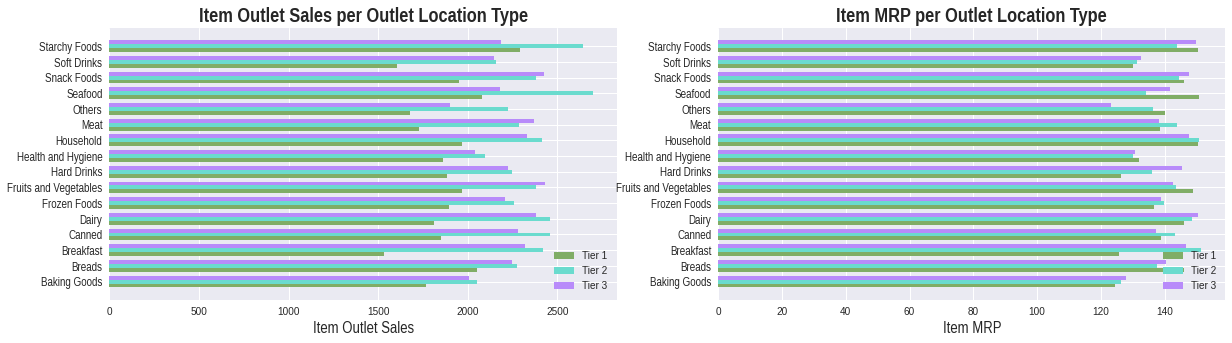

In [47]:
labels = []
for i in range(0, len(outlet_sales), 3):
  labels.append(outlet_sales.index[i][0])

tier1 = []
for i in range(0, len(outlet_sales), 3):
  tier1.append(outlet_sales[i])

tier2 = []
for i in range(1, len(outlet_sales), 3):
  tier2.append(outlet_sales[i])

tier3 = []
for i in range(2, len(outlet_sales), 3):
  tier3.append(outlet_sales[i])

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)

y = np.arange(len(labels))  
width = 0.25 

bar1 = plt.barh(y - width, tier1, width, label ='Tier 1', color = "#80AD66")
bar2 = plt.barh(y, tier2, width, label ='Tier 2', color = "#6ADBCE")
bar3 = plt.barh(y + width, tier3, width, label ='Tier 3', color = "#B88BFA")

plt.xlabel("Item Outlet Sales", fontsize = 16, fontname = "Liberation Sans Narrow")
plt.yticks(fontsize = 10, fontname = "Liberation Sans Narrow")
plt.yticks(y, labels, fontsize = 12, fontname = "Liberation Sans Narrow")
plt.title("Item Outlet Sales per Outlet Location Type", fontsize = 20, 
          fontname = "Liberation Sans Narrow", fontweight = "bold")
plt.legend()


labels = []
for i in range(0, len(item_MRP), 3):
  labels.append(item_MRP.index[i][0])

tier1 = []
for i in range(0, len(item_MRP), 3):
  tier1.append(item_MRP[i])

tier2 = []
for i in range(1, len(item_MRP), 3):
  tier2.append(item_MRP[i])

tier3 = []
for i in range(2, len(item_MRP), 3):
  tier3.append(item_MRP[i])

plt.subplot(1,2,2)

y = np.arange(len(labels))  
width = 0.25 

bar1 = plt.barh(y - width, tier1, width, label ='Tier 1', color = "#80AD66")
bar2 = plt.barh(y, tier2, width, label ='Tier 2', color = "#6ADBCE")
bar3 = plt.barh(y + width, tier3, width, label ='Tier 3', color = "#B88BFA")

plt.xlabel("Item MRP", fontsize = 16, fontname = "Liberation Sans Narrow")
plt.yticks(fontsize = 10, fontname = "Liberation Sans Narrow")
plt.yticks(y, labels, fontsize = 12, fontname = "Liberation Sans Narrow")
plt.title("Item MRP per Outlet Location Type", fontsize = 20, 
          fontname = "Liberation Sans Narrow", fontweight = "bold")
plt.legend(loc = "best")



plt.show();

In [48]:
salesp_df.groupby(["Outlet_Location_Type"])["Item_Outlet_Sales"].mean().round(2)

Outlet_Location_Type
Tier 1    1876.91
Tier 2    2323.99
Tier 3    2279.63
Name: Item_Outlet_Sales, dtype: float64

In [49]:
salesp_df.groupby(["Outlet_Location_Type"])["Item_MRP"].mean().round(2)

Outlet_Location_Type
Tier 1    140.87
Tier 2    141.17
Tier 3    140.94
Name: Item_MRP, dtype: float64

About the first plot, we can see, on average, Tier 2 location type obtains more sales per item type (2323.99\$). Followed by the Tier 3 location type (2279.63\$), and finally tier 1 location (1876.91\$), which obtained fewer sales per item type. Thus, we can conclude it is better to open an outlet in a Tier 2 location type. However, this analysis should be accompanied by an item MRP per item type analysis. Which is presented in the second plot. 

About the second plot, we can see the item MRP was very uniform for the three location types. The mean item MRP per outlet location type was: 140.87$ for Tier 1, 141.17\$ for Tier 2, and 140.94\$ for Tier 3. This result is interesting because it brings to the table how the outlet location type influences the sales. 